In [12]:
#read data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
corpus = pd.read_csv("/Users/rakeshravi/Documents/Spring/Text Analytics/Project/corpus.csv", sep = "|")

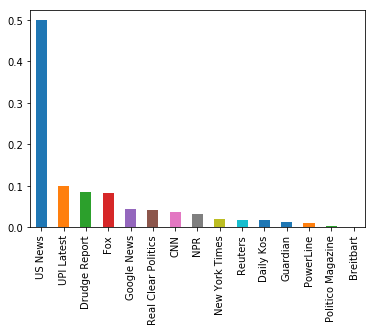

In [13]:
#what is distribution for sources
corpus.doc_source.value_counts(normalize = True).plot('bar')

In [16]:
# assigning labels of left leaning (L) and right leaning (R)
list_of_sources = ['US News ',
'UPI Latest',
'Drudge Report',
'Fox',
'Google News',
'Real Clear Politics',
'CNN',
'NPR',
'New York Times',
'Reuters',
'Daily Kos ',
'Guardian',
'PowerLine',
'Politico Magazine ',
'Breitbart']

list_of_labels = ['left-center',
'center',
'right',
'right',
'left',
'right-center',
'left',
'left-center',
'left-center',
'center',
'left',
'left-center',
'right',
'center',
'right']

dictionary = dict(zip(list_of_sources, list_of_labels))
corpus['label']= corpus['doc_source'].map(dictionary)

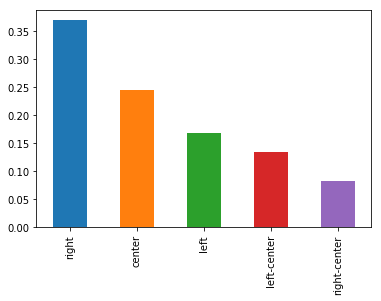

In [24]:
#distribution of different labels
corpus.label.value_counts(normalize = True).plot('bar')

In [32]:
# Run in python console
import nltk; nltk.download('stopwords')
# Run in terminal or command prompt
!python3 -m spacy download en

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rakeshravi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


    100% |████████████████████████████████| 37.4MB 24.3MB/s ta 0:00:011   34% |███████████                     | 12.7MB 39.3MB/s eta 0:00:01    57% |██████████████████▎             | 21.3MB 40.3MB/s eta 0:00:01
  Running setup.py install for en-core-web-sm ... done

    Linking successful
    /anaconda3/lib/python3.6/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [37]:
#imporiting all libraries
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
# Convert to list
data = corpus.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])